# Tasks 2020

***
These are the solutions to the 2020 Task Assessments for the Machine Learning & Statistics module.

The author of these tasks is Dervla Candon (G00283361@gmit.ie).
***


## Task 1
***
_Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm._
***


Newton's method is one of the most common for estimating the square root of a number[1]. This method is also referred to as the Babylonian method[2].

The iterative equation for calculating x, square root of a, is as follows:

\\[x_{n+1}=\frac{1}{2}(x_{n} + \frac{a}{x_{n}})\\]

In [1]:
###as per the system calculator, the correct value is 1.414213562373
##to use as reference to confirm output is correct

def sqrt2():
    # setting an initial value as half of 2, i.e. 1
    x0 = 1
    # defining the second value for the iteration
    # value is negligible, provided it allows the while loop to begin
    xn = 2
    # define a tolerance limit based on the square of the estimate
    while (xn**2)-2 > 0.00000001:
        # tmp variable used to temporarily hold the old value of xn, to reassign to x0 at the end of the loop
        tmp = xn
        # use Newton's method to calculate a closer approximation
        xn = 0.5*(x0 + 2/x0)
        x0 = tmp
    string_xn = "{:0.100f}".format(xn)
    float_xn = float(string_xn)
    return string_xn

In [2]:
sqrt2()

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

***

## Task 2
***
_The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell._
***

<br>

The Chi-squared test is used to determine if there is a significant difference between the expected frequency and an observed frequency. The null hypothesis for these tests is that the variation between the observed and expected frequencies is negligible, rather than due to another underlying factor. A sufficiently large value for Chi-squared indicates that the null hypothesis should be rejected [3].

<br>

In [3]:
import scipy.stats as sp
import numpy as np
import pandas as pd

# defining an array of the data categories
# results will be the same whether the arrays are grouped by occupation or neighbourhood
x = np.array([[90,30,30],[60,50,40],[104,51,45],[95,20,35]])
# only 1 input is required in the chi squared test
# output is 4 variables [4]
chi2,p,dof,expected = sp.chi2_contingency(x)

In [4]:
chi2

24.571202858582602

In [5]:
p

0.0004098425861096692

In [6]:
dof

6

For the test data, the null hypothesis being tested is whether occupation and home neighbourhood are independent of one another.

Assuming a confidence interval of 95%, a p-value of less than or equal to 0.05 implies that the probability of the observed values occurring in a population wherein the null hypothesis is true is not significant. 

Here, as the p-value is ~0.00041, the null hypothesis is rejected, resulting in the conclusion that a randomly selected person's neighbourhood has an impact on the likelihood that they will fall within a certain occupation category.

***

## Task 3

*The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))* *2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDDEV.S . The STDDEV.P function performs the above calculation but in the STDDEV.S calculation the division is by len(x)-1 rather than len(x). Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.*

***

For the excel functions STDEV.P and STDEV.S, P stands for population [6] while S stands for sample [7]. STDEV.P should be used if the input data represents the entire population; if the values represent a sample from the population, STDEV.S is the appropriate choice. 


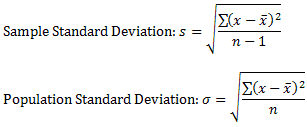

The formulae are near-indentical, with the difference lying in the divisor of the fraction [8]. The divisor in the sample standard deviation is smaller, which gives a larger overall result, which makes logical sense - if the values represent a sample of the population, then the spread of those values would be expected to be larger to account for all the unknown values not sampled.

When numerical arrays are calculated, these represent a sample selected from the probability distribution used to generate the array; thus I would expect the STDEV.S formula to better represent the standard deviation of the array.

In [7]:
#this is the accurate standard deviation to use for comparison
scale1=1
trials=1000
# empty arrays to hold outputs
results_S = []
results_P = []

# looping through multiple trials to obtain a more accurate average
for i in range(trials):
    # size must be small enough so that it does not resemble a population instead of a sample
    x1 = np.random.normal(loc=0,scale=scale1,size=10)
    #calculate the standard deviation of a sample
    STDEV_S = np.sqrt(np.sum((x1 - np.mean(x1))**2)/len(x1))
    #append the results to an output array
    results_S.append(STDEV_S)
    #caluclate the standard deviation of a population
    STDEV_P = np.sqrt(np.sum((x1 - np.mean(x1))**2)/(len(x1)-1))
    #append results to another output array
    results_P.append(STDEV_P)

#calculate the average of all output standard deviations to print to screen
print(np.mean(results_P),np.mean(results_S))

0.9923099914590464 0.9413879153858453


As shown by the output of the above code, the STDEV.S formula provides a closer estimate of the actual standard deviation that the STDEV.P formula.

***

## Task 4

*Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.*

***

In [8]:
# first the dataset needs to be loaded - pandas has already been imported
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
# adding column headers to the data
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]

In [9]:
# scikit learn to allow for k-means clustering
import sklearn.cluster as skcl

In [10]:
# perform the k-means clustering on the iris dataset with 3 clusters, 1 for each iris species
# need to exclude the species column from the analysis
# code adapted from topic 6 lecture
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])

<br>

When looking at the labels that the K-Means clustering has assigned to the dataset, it appears that for the large part the iris-setosa has been correctly clustered, however there appears to be a much larger error rate for the remainder of the dataset, as seen by the alterations between 0 and 2 values

<br>

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [12]:
# create a dictionary to assign actual cluster values to the dataset
species_numbers = {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":0}

In [13]:
#adding actual and predicted cluster values to the dataset
df['Actual Cluster'] = df['Class'].map(species_numbers)
df['K-Means Cluster'] = kmeans.labels_
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Actual Cluster,K-Means Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


<br>

As seen in the comparison below, 16 of the K-Means predictions have resulted in a value being assigned to the incorrect cluster.

<br>

In [14]:
# compare the actual cluster value to the K-Means cluster to find the number of incorrect predictions
(df['Actual Cluster'] == kmeans.labels_).value_counts()

True     134
False     16
Name: Actual Cluster, dtype: int64

<br>

As seen in the seaborn plots below - the first showing the actual clustering of the dataset, the second showing the K-Means culsters - the main area that the K-Means clustering has incorrectly predicted correlates with the areas on the graphs which show significant overlap between the iris-veriscolor and iris-virginica.

For example, the sepal length vs sepal width plots show a heavy overlap between the blue and green dots in the actual graph, but this overlap is much less evident in the K-Means clusters

<br>

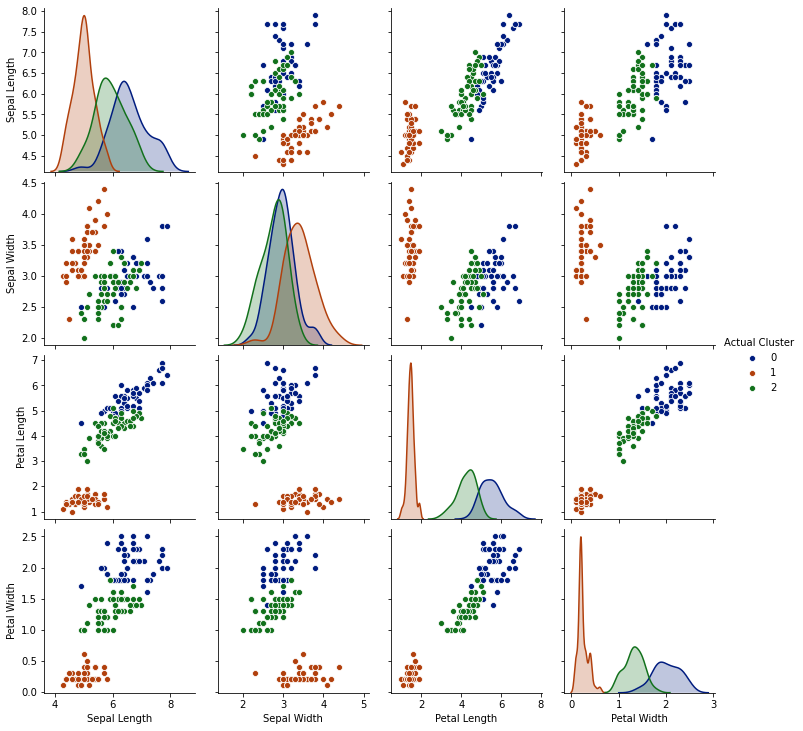

In [15]:
import seaborn as sns
sns.color_palette("hls", 8)
sns.pairplot(data=df[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class", "Actual Cluster"]],palette = "dark", hue='Actual Cluster')

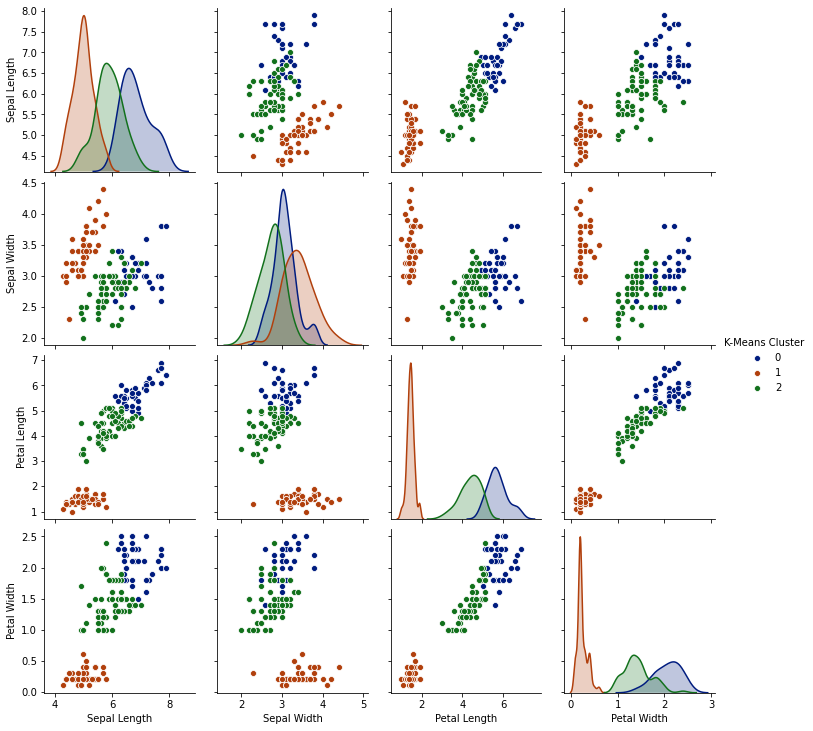

In [16]:
sns.pairplot(data=df[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class", "K-Means Cluster"]], palette = "dark", hue="K-Means Cluster")

<br>

In order to predict clusters for new values, the kmeans.predict function is used on a 2D array, with each array containing 4 values, one for each numerical variable in the dataset.

The output corresponds to the cluster, and as such the iris species, to which the new measurements belong.

<br>

In [17]:
newvals = np.array([[5,3,1.5,2],[6.2,3.4,5.4,2.3],[6.7,3,5.2,2.3]])
prediction = kmeans.predict(newvals)
prediction

array([1, 0, 0])

### References

[1] Newton's Method; Wikipedia; https://en.wikipedia.org/wiki/Newton%27s_method#Square_root

[2]Methods of Computing Square Root; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method

[3] Chi-Squared Test; Wikipedia; https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096

[4] Chi2 Contingency; Scipy; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

[5] p Values; statsdirect; https://www.statsdirect.com/help/basics/p_values.htm

[6] How To Use Excel STDEV.P Function; ExcelTip; https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html

[7] STDEV.S Function; Microsoft; https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[8] Standard Deviation in Excel; Svetlana Cheusheva; https://www.ablebits.com/office-addins-blog/2017/05/31/calculate-standard-deviation-excel/

***

# End

***